In [180]:
# Import Libraries
import numpy as np # linear algebra
from matplotlib import pyplot as plt # Visualization
import time

In [178]:
# Class for Kohonen Self-Organising Maps
class KSOM(object):
    
    # Initializing the object
    def __init__(self,map,d,sigma):
        
        # Dimensionality Reduction into 2D map
        self.map = map
        # 3 channel Image (Red-Blue-Green)
        self.d = d
        # Intializing random weights
        self.weights = np.random.random_sample((map[0],map[1],d))
        # Learning Rate
        self.eta = 0.8
        # Sigma for calculating the neighbourhood
        self.sigma = sigma
        # Total number of epochs for training
        self.epochs = 1000
        
        # Initializing an array of indexes for calculating the neighbourhood in training
        self.index_array=np.zeros(((map[0],map[1],2)))
        for i in range(len(self.weights)):
            for j in range(len(self.weights[0])):
                self.index_array[i][j] = np.array([i,j])
    
    # Updating the sigma value for each iteration
    def update_sigma(self,k):
        return self.sigma * np.exp((-1*k)/self.epochs)
    
   # Function for training the self-organising map
    def train(self,X):
        
        # Plotting the initial image
        plt.imshow(self.weights)
        title = "Original Image with sigma = " + str(self.sigma)
        plt.title(title)        
        plt.show()
        
        # Iterating over epochs
        for epoch in range(self.epochs): 
            
            # Upadting sigma
            sigma = self.update_sigma(epoch)
            
            # Iterating over the input X
            for x in X:
                
                # Tiling the input in the shape of weight matrix for comparison with each node weights
                x = np.tile(x,(self.map[0],self.map[1],1))
                # Array of differences between a input and all the nodes on the map
                diff_array = np.linalg.norm(x-self.weights,axis = 2)**2
                # Finding the node with minimum index from the input: Best Matching Unit(bmu)
                min_value_index_list = np.where(diff_array == np.amin(diff_array))
                bmu_index = np.array(list(zip(min_value_index_list[0], min_value_index_list[1]))[0])
                # Tiling the bmu index to find its distance from evry node in the neighbourhood (Here, the neighbourhood is the entire map) 
                bmu_index_array = np.tile(bmu_index,(map[0],map[1],1))  
                # Calculating the distance between the bmu and all the nodes in the map. 
                neighbour_dist = np.linalg.norm(self.index_array - bmu_index_array,axis = 2)**2
                # Calculating the influence of bmu on each node (Closer the node to the bmu, larger the influence)
                neighbour_influence = np.exp(-1*(neighbour_dist/(2*(sigma**2))))
                # Calculating the amount of change in the weights of each node w.r.t the bmu
                delta = ((x - self.weights).T * neighbour_influence.T).T 
                # Updating the weights
                self.weights = self.weights + self.eta * delta

            
            # Completion of an epoch
            # print("Epoch: ",epoch+1,"/",self.epochs," completed")
            # Plotting the image after these epochs
            if epoch in [19,39,99,999]:
                plt.imshow(self.weights)
                title = "Image after " + str(epoch+1) +" epochs with sigma = " + str(self.sigma)
                plt.title(title)
                plt.show()

SIGMA =  1


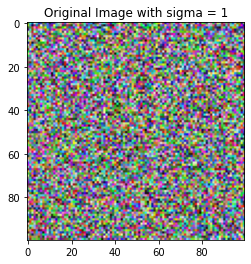

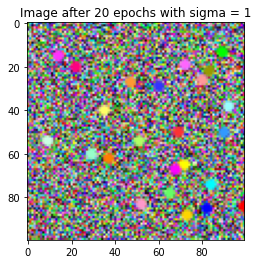

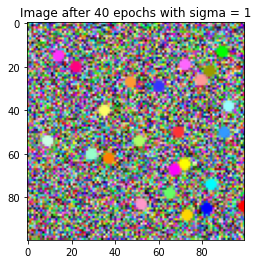

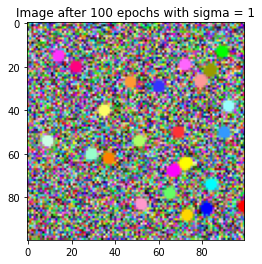

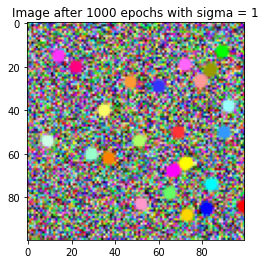

DONE in  27.179795265197754  seconds
SIGMA =  10


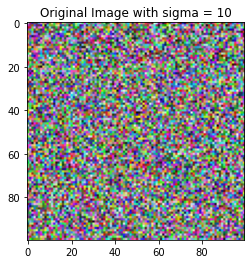

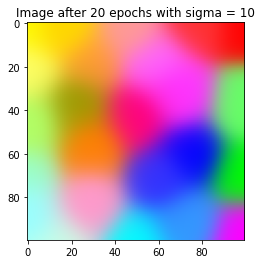

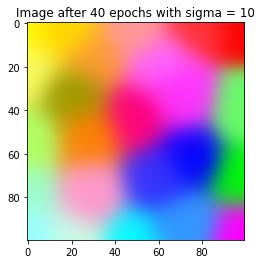

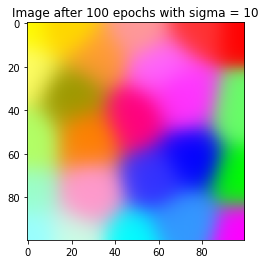

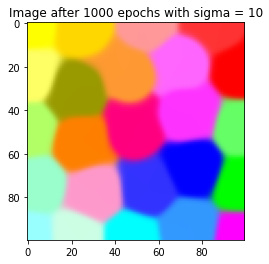

DONE in  27.10316276550293  seconds
SIGMA =  30


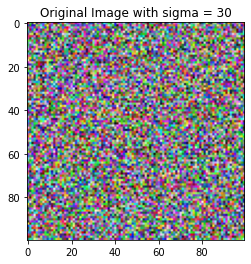

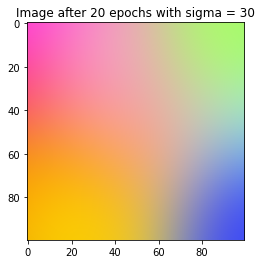

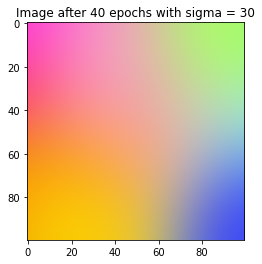

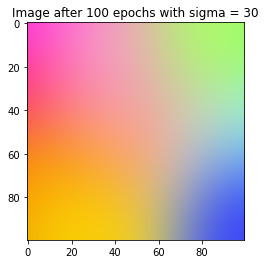

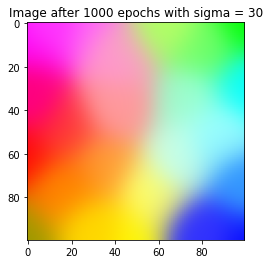

DONE in  26.79728603363037  seconds
SIGMA =  50


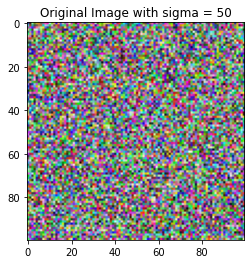

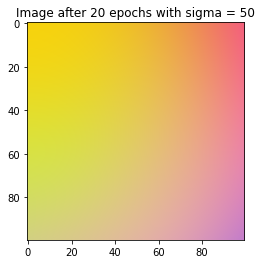

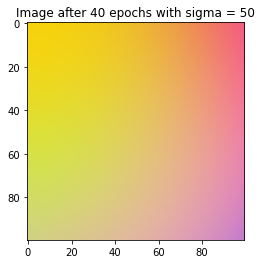

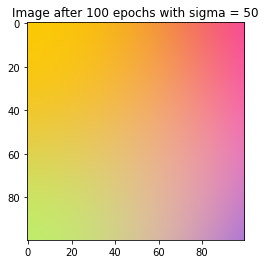

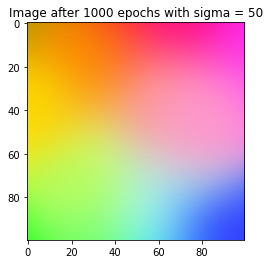

DONE in  26.5354905128479  seconds
SIGMA =  70


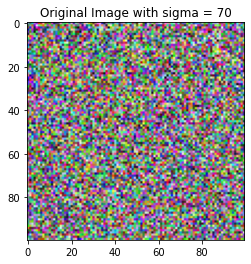

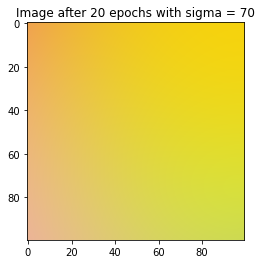

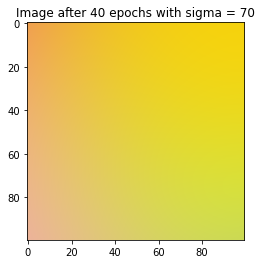

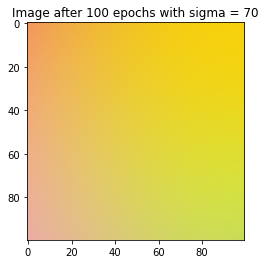

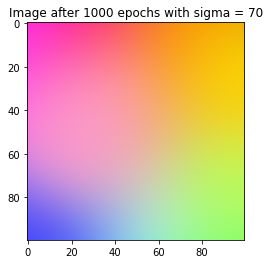

DONE in  26.61318588256836  seconds


In [179]:
# Hardcoded-Dataset with 24 colors (shades of red, green, blue, with some yellow, teal and pink)
X =[[0,255,0],[0,0,255],[255,0,0],[255,255,0],[0,255,255],[255,0,255],[255,51,51],[255,153,51],[255,255,102],[102,255,102],[153,255,204],[204,255,229],[153,255,255],[51,153,255],[51,51,255],[255,102,255],[255,51,255],[255,0,127],[153,153,0],[255,153,153],[255,128,0],[255,153,204],[178,255,102],[255,215,0]]

X = np.array(X)
# Normalizing the dataset (minimum value = 0 ; maximum value = 255)
X=X / 255.0

#Initializing the 2D map for SOM
map =[100,100]
# For 3 channel images(RGB)
d = 3

# Observing the difference over these values of sigma
sigmas = [1,10,30,50,70]

# Iterating over sigmas
for sigma in sigmas :
    
    print("SIGMA = ",sigma)
    obj = KSOM(map,d,sigma)
#     start = time.time()
    obj.train(X)
#     print("DONE in ", time.time() - start , " seconds")